In [1]:
%config Completer.use_jedi = False  # enable code auto-completion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures   
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Football_player_statistics.csv')

# dropping unnecessary columns from the dataset
df.drop(columns=['Nation', 'Rk', 'Comp', 'Age', 'Born', 'FK','PK','PKatt','xG','npxG','npxG/Sh','SoT%',
                'G/Sh','G/SoT','Dist','G-xG','np:G-xG','Matches', '-9999'], inplace=True)

# renaming the columns
df.columns=['Name','Position','Team','90s','Goals','Shots','Shots on target',
            'Shots/90', 'Shots on target/90']

# drop player who aren't mainly strikers
df = df[df['Position'].astype(str).str[0] == 'F']
# drop strikers who haven't played a full 90 minutes during the season or taken a shot
df = df[df['90s'] >= 1]
df = df[df['Shots'] != 0]


df

,Name,Position,Team,90s,Goals,Shots,Shots on target,Shots/90,Shots on target/90
5,Dickson Abiama,FW,Greuther Fürth,8.1,0,18,4,2.23,0.50
6,Matthis Abline,FW,Rennes,1.1,0,2,0,1.75,0.00
7,Tammy Abraham,FW,Roma,34.3,17,93,32,2.71,0.93
13,Che Adams,FW,Southampton,22.7,7,49,24,2.16,1.06
15,Sargis Adamyan,FWMF,Hoffenheim,3.7,1,3,2,0.82,0.54
...,...,...,...,...,...,...,...,...,...
2897,Simone Zaza,FWMF,Torino,1.4,0,9,3,6.28,2.09
2901,Arber Zeneli,FW,Reims,4.5,2,11,3,2.42,0.66
2903,Andi Zeqiri,FWMF,Augsburg,11.3,2,32,9,2.83,0.80
2911,Hakim Ziyech,FWMF,Chelsea,14.7,4,53,19,3.62,1.30


In [3]:
# features
X = df[['Shots', 'Shots on target']].to_numpy().reshape(-1, 2)
# label
y = df['Goals'].to_numpy()

X_train, X_val_train, y_train, y_val_train = train_test_split(X, y, test_size=0.4,
                                                  random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_train, y_val_train, test_size=0.5,
                                                  random_state=42)

In [4]:
# linear regression
regr = LinearRegression()

# training set
regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
tr_error = mean_squared_error(y_train, y_train_pred)

# validation set
regr.fit(X_val, y_val)
y_val_pred = regr.predict(X_val)
val_error = mean_squared_error(y_val, y_val_pred)

print(tr_error)
print(val_error)

4.71525332599386
3.345374792479929


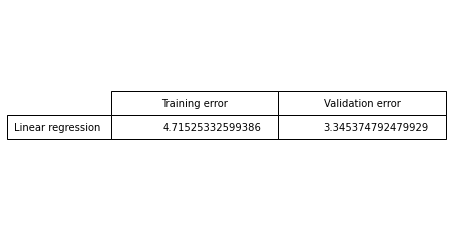

In [5]:
# table for linear

data =  [
            [                 'Training error', 'Validation error'],
            ['Linear regression',  f"{tr_error}", f"{val_error}"]
        ]

# Pop the headers from the data array
column_headers = data.pop(0)
row_headers = [x.pop(0) for x in data]

# Add a table at the bottom of the axes
the_table = plt.table(cellText=data,
                      rowLabels=row_headers,
                      rowLoc='right',
                      colLabels=column_headers,
                      loc='center')

# Scaling is the only influence we have over top and bottom cell padding.
# Make the rows taller (i.e., make cell y scale larger).
the_table.scale(1, 2)

# Hide axes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Hide axes border
plt.box(on=None)

In [6]:
# test error for linear
regr = LinearRegression()
regr.fit(X_test, y_test)
y_test_pred = regr.predict(X_test)
test_error = mean_squared_error(y_test, y_test_pred)

print(f"Test error: {test_error}")

Test error: 4.238926155410416


In [7]:
# polynomial regression
lin_regr = LinearRegression(fit_intercept=False)
tr_errors = []
val_errors = []

for i in range(2, 11):
    poly = PolynomialFeatures(i)
    
    # training set
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)
    y_train_pred = lin_regr.predict(X_train_poly)
    tr_errors.append(mean_squared_error(y_train, y_train_pred))
    
    # validation set
    X_val_poly = poly.fit_transform(X_val)
    y_val_pred = lin_regr.predict(X_val_poly)
    val_errors.append(mean_squared_error(y_val, y_val_pred))

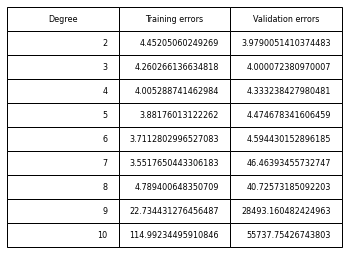

In [8]:
# table for polynomial

data = [['Degree', 'Training errors', 'Validation errors']]
for i in range(2,11):
    data.append([str(i), str(tr_errors[i-2]), str(val_errors[i-2])])

column_headers = data.pop(0)

the_table = plt.table(cellText=data,
                      rowLabels=None,
                      rowLoc='right',
                      colLabels=column_headers,
                      loc='center')

the_table.scale(1, 2)

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)

In [9]:
#test error for best degree of polynomial
lin_regr = LinearRegression(fit_intercept=False)
poly = PolynomialFeatures(3)
X_test_poly = poly.fit_transform(X_test)
lin_regr.fit(X_test_poly, y_test)
y_test_pred = lin_regr.predict(X_test_poly)
test_error = mean_squared_error(y_test, y_test_pred)

print(f"Test error: {test_error}")

Test error: 3.2800957975281633


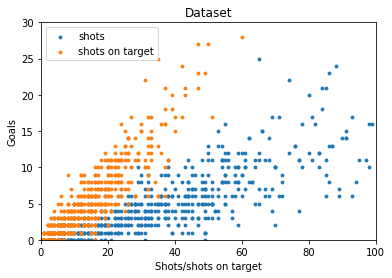

In [10]:
# data scatter plot
plt.scatter(X[:,0], y, s=8)
plt.scatter(X[:,1], y, s=8)
plt.xlim([0,100])
plt.ylim([0,30])
plt.legend(['shots', 'shots on target'], loc='upper left')
plt.title('Dataset')
plt.xlabel('Shots/shots on target')
plt.ylabel('Goals')
plt.show()